# Analysis of World Energy Data from 1990 to 2020.
### Dataset source: https://www.kaggle.com/datasets/shub218/energy-data-1990-2020

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('Energy data 1990 - 2020.csv')

In [3]:
df.head()

,country,Year,Region,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),...,Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
0,Algeria,1990,Arab States,52.981921,2.387855,0.228889,100.112749,22.188078,0.782972,8.376592,...,25.395,45.68403547,14.301991,0.095856,17.242,13.693,0.94,0,57.850,0
1,Algeria,1991,Arab States,57.149971,2.435026,0.249895,102.586171,23.469959,1.580793,7.994748,...,25.435,49.53198889,15.312995,0.102625,18.535,14.058,1.171,0,57.076,0
2,Algeria,1992,Arab States,57.262430,2.383517,0.245959,104.205908,24.024343,1.022926,8.490068,...,25.459,51.67001137,15.727010,0.103192,19.454,15.130,1.056,0,56.904,0
3,Algeria,1993,Arab States,59.198702,2.455335,0.259730,104.928745,24.110238,1.709195,8.291029,...,25.463,52.38599054,16.596984,0.105782,20.653,15.144,1.015,0,56.995,0
4,Algeria,1994,Arab States,56.347927,2.424649,0.249468,100.612596,23.239627,0.783869,9.170605,...,23.971,48.20601995,16.117004,0.102888,21.177,15.545,0.943,0,56.312,0


In [4]:
# checking data types

df.dtypes

country                                                                      object
Year                                                                          int64
Region                                                                       object
CO2 emissions from fuel combustion (MtCO2)                                  float64
Average CO2 emission factor (tCO2/toe)                                      float64
CO2 intensity at constant purchasing power parities (kCO2/$15p)             float64
Total energy production (Mtoe)                                              float64
Total energy consumption (Mtoe)                                             float64
Share of renewables in electricity production (%)                           float64
Share of electricity in total final energy consumption (%)                  float64
Oil products domestic consumption (Mt)                                      float64
Refined oil products production (Mt)                                        

In [5]:
# replacing n.a. and converting data types to float

df['Natural gas production (bcm)'] = pd.to_numeric(df['Natural gas production (bcm)'], errors = 'coerce').fillna(0)
df['Coal and lignite domestic consumption (Mt)'] = pd.to_numeric(df['Coal and lignite domestic consumption (Mt)'], errors = 'coerce').fillna(0)
df['Share of wind and solar in electricity production (%)'] = pd.to_numeric(df['Share of wind and solar in electricity production (%)'], errors = 'coerce').fillna(0)
df['Coal and lignite production (Mt)'] = pd.to_numeric(df['Coal and lignite production (Mt)'], errors = 'coerce').fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 21 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country                                                                   1364 non-null   object 
 1   Year                                                                      1364 non-null   int64  
 2   Region                                                                    1364 non-null   object 
 3   CO2 emissions from fuel combustion (MtCO2)                                1364 non-null   float64
 4   Average CO2 emission factor (tCO2/toe)                                    1364 non-null   float64
 5   CO2 intensity at constant purchasing power parities (kCO2/$15p)           1364 non-null   float64
 6   Total energy production (Mtoe)                                  

In [7]:
df.describe()

,Year,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2005.000000,550.375178,2.238542,0.339275,229.826912,225.967632,24.076995,17.622567,68.848847,76.888589,58.483769,59.809200,0.148322,388.581268,334.988933,131.105880,2.484005,74.128901,132.116314
std,8.947552,1213.057599,0.560594,0.246502,400.993541,445.242818,25.490850,7.296381,128.339745,134.644907,131.115993,117.396106,0.090503,834.834194,732.822644,421.713232,4.966028,119.664826,411.988597
min,1990.000000,7.597759,0.412331,0.063650,2.939712,2.622633,0.000000,0.937144,1.949000,0.013357,0.000000,0.000000,0.051662,10.780000,7.871000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,99.947198,2.021666,0.194481,34.720989,46.632538,6.097708,13.259106,12.809000,15.883000,2.394750,10.650942,0.094997,70.020000,55.962250,2.885500,0.001706,1.599250,0.148500
50%,2005.000000,221.036281,2.339406,0.255510,102.602180,93.825969,14.871924,16.869971,27.752179,37.011757,19.859993,28.045997,0.121372,146.845534,123.632788,21.457516,0.136850,25.896500,4.824937
75%,2013.000000,423.833152,2.521811,0.421460,217.237230,195.807818,33.281413,21.392581,77.500856,85.048250,52.452236,53.495693,0.176885,308.447191,287.612059,79.853024,2.678928,106.382250,72.811000
max,2020.000000,9716.772478,3.516984,1.820894,2749.046580,3381.399262,99.817877,50.011500,888.491000,908.397596,959.849849,882.637083,0.775061,7797.561415,6752.147800,3970.175482,32.093219,748.192443,3748.530000


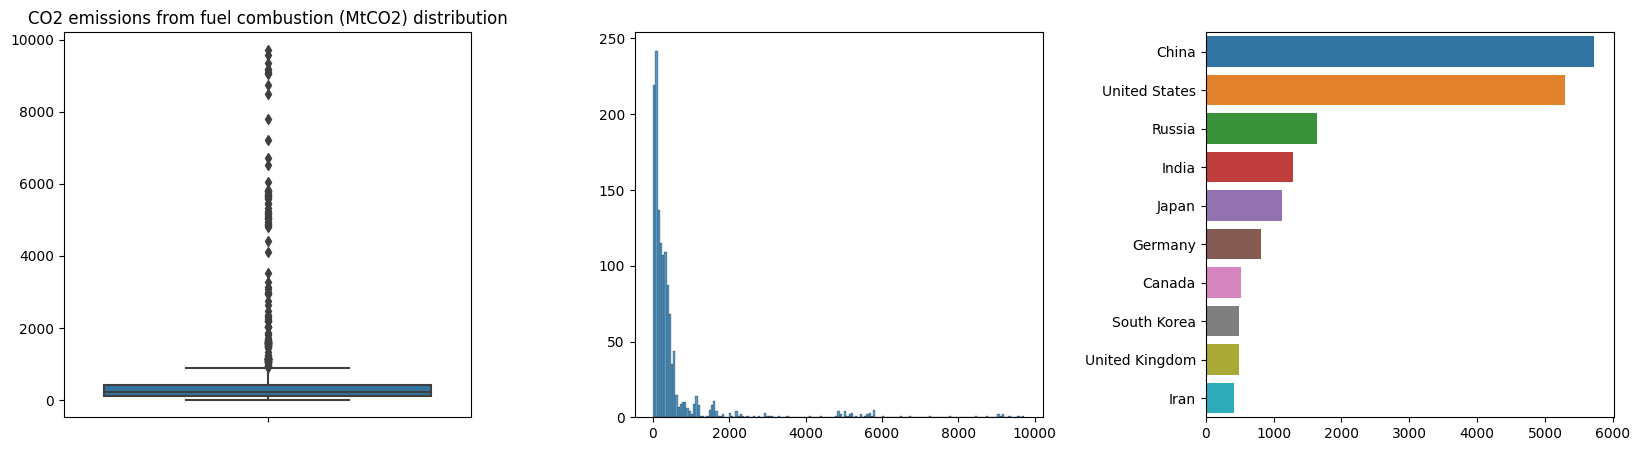

In [8]:
# plotting data

fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('CO2 emissions from fuel combustion (MtCO2) distribution')
sns.boxplot(data=df, y='CO2 emissions from fuel combustion (MtCO2)', ax=axes[0]).set_ylabel('')

sns.histplot(data=df, x='CO2 emissions from fuel combustion (MtCO2)', ax=axes[1]).set_xlabel('')

grouped_df = df.groupby('country')['CO2 emissions from fuel combustion (MtCO2)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'CO2 emissions from fuel combustion (MtCO2)').sort_values('CO2 emissions from fuel combustion (MtCO2)', ascending=False)

sns.barplot(data=sorted_df, x='CO2 emissions from fuel combustion (MtCO2)', y = 'country', ax=axes[2], errorbar = None, order=sorted_df['country']).set_ylabel('')
axes[1].set_ylabel("")
axes[2].set_xlabel("")

plt.show()

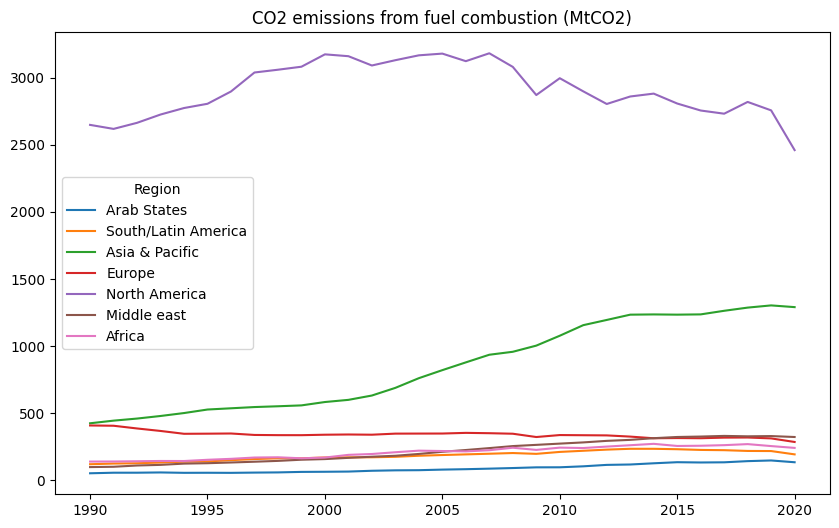

In [9]:
# plotting data

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='CO2 emissions from fuel combustion (MtCO2)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('CO2 emissions from fuel combustion (MtCO2)')
plt.xlabel("")
plt.ylabel("")
plt.show()

### The largest contributor to CO2 emissions from fuel combustion is currently China, followed by the United States. Since 2006, North American emissions have been declining, while emissions in other regions have remained relatively stable. However, China's emissions have been steadily increasing, making it the largest contributor to global CO2 emissions from fuel combustion.

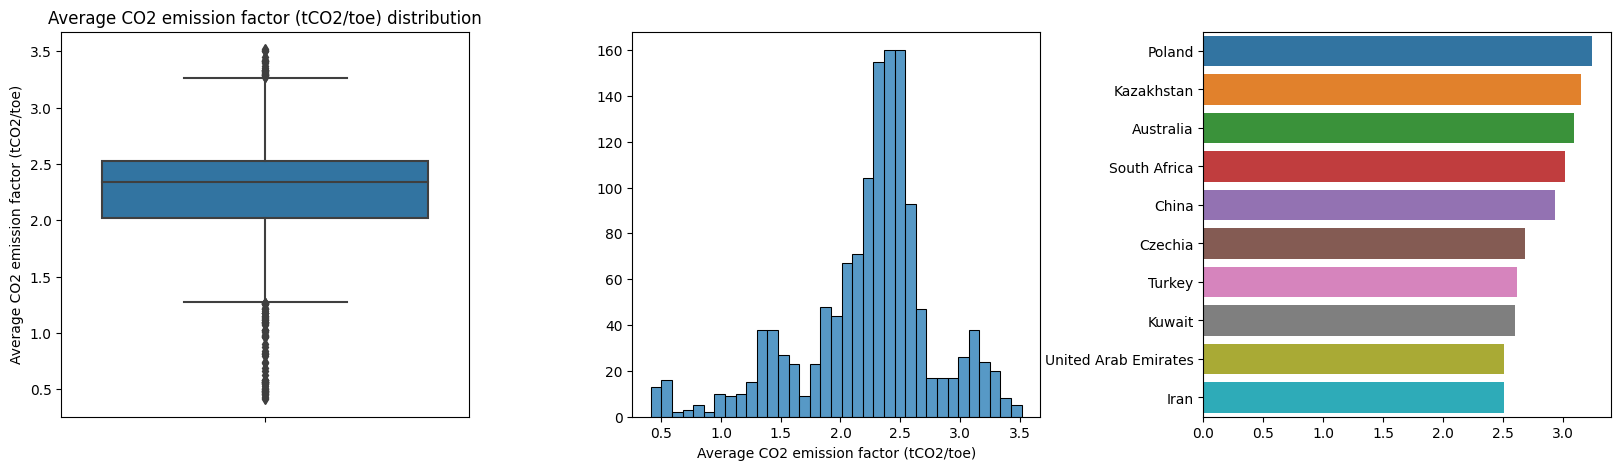

In [10]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Average CO2 emission factor (tCO2/toe) distribution')
sns.boxplot(data=df, y='Average CO2 emission factor (tCO2/toe)', ax=axes[0]).set_ylabel('Average CO2 emission factor (tCO2/toe)')

sns.histplot(data=df, x='Average CO2 emission factor (tCO2/toe)', ax=axes[1]).set_xlabel('Average CO2 emission factor (tCO2/toe)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Average CO2 emission factor (tCO2/toe)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Average CO2 emission factor (tCO2/toe)').sort_values('Average CO2 emission factor (tCO2/toe)', ascending=False)

sns.barplot(data=sorted_df, x='Average CO2 emission factor (tCO2/toe)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()


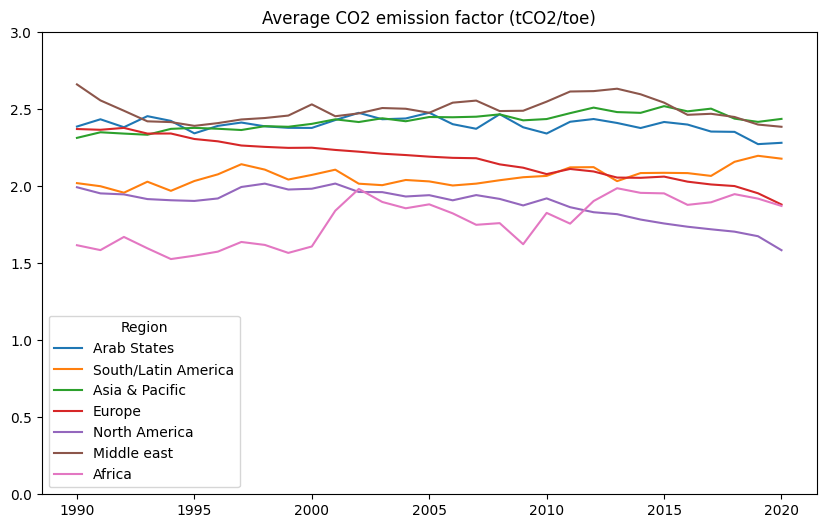

In [11]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Average CO2 emission factor (tCO2/toe)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Average CO2 emission factor (tCO2/toe)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 3)
plt.show()

### North America has achieved the lowest CO2 emission factor across all regions, with a reduction of almost 1.5 times since 2001. Similarly, Europe has also experienced a significant decrease.

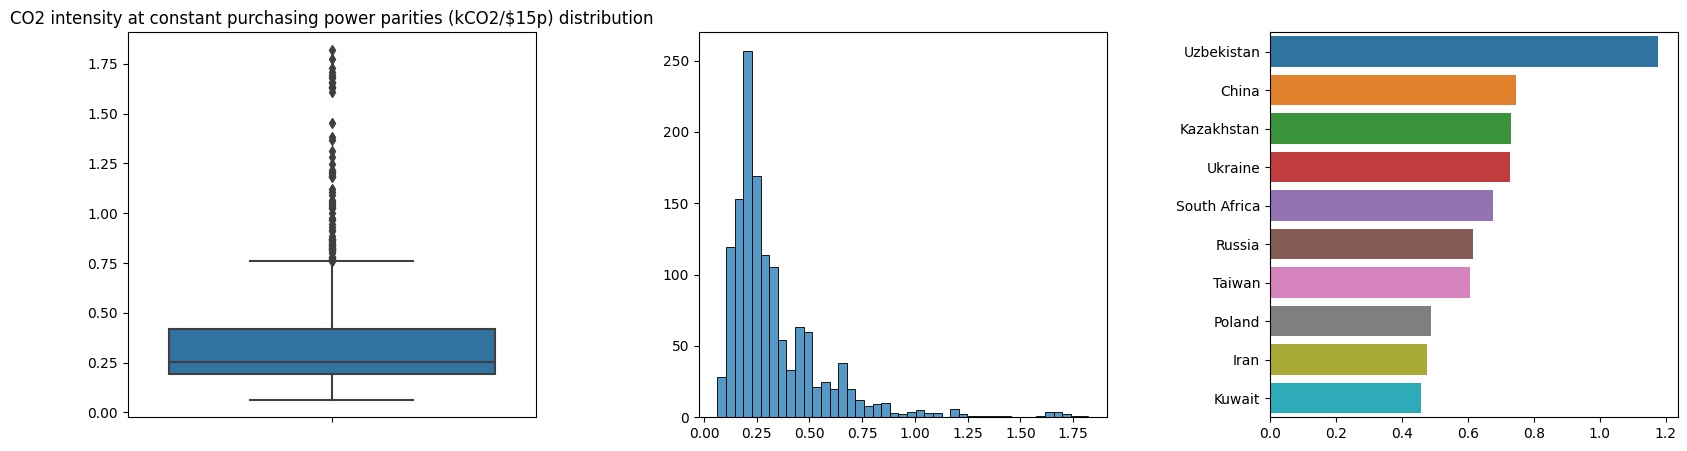

In [12]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('CO2 intensity at constant purchasing power parities (kCO2/$15p) distribution')
sns.boxplot(data=df, y='CO2 intensity at constant purchasing power parities (kCO2/$15p)', ax=axes[0]).set_ylabel('CO2 intensity at constant purchasing power parities (kCO2/$15p)')

sns.histplot(data=df, x='CO2 intensity at constant purchasing power parities (kCO2/$15p)', ax=axes[1]).set_xlabel('CO2 intensity at constant purchasing power parities (kCO2/$15p)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['CO2 intensity at constant purchasing power parities (kCO2/$15p)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'CO2 intensity at constant purchasing power parities (kCO2/$15p)').sort_values('CO2 intensity at constant purchasing power parities (kCO2/$15p)', ascending=False)

sns.barplot(data=sorted_df, x='CO2 intensity at constant purchasing power parities (kCO2/$15p)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")
axes[0].set_ylabel("")
axes[1].set_xlabel("")
plt.show()

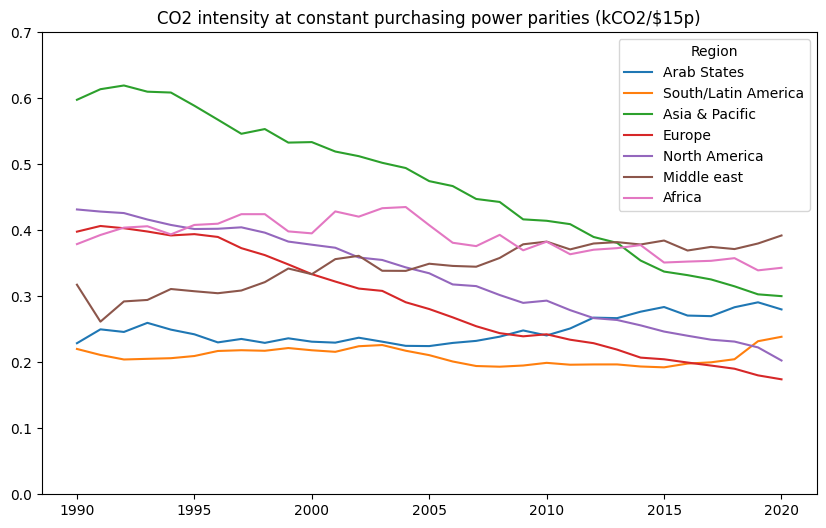

In [13]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='CO2 intensity at constant purchasing power parities (kCO2/$15p)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('CO2 intensity at constant purchasing power parities (kCO2/$15p)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 0.7)
plt.show()

### The regions of Central Asia and Eastern Europe exhibit the highest level of energy intensity of their GDP, which refers to the amount of energy required to produce one unit of economic output. These regions consume a relatively high amount of energy to produce a given level of economic activity compared to other regions in the world.

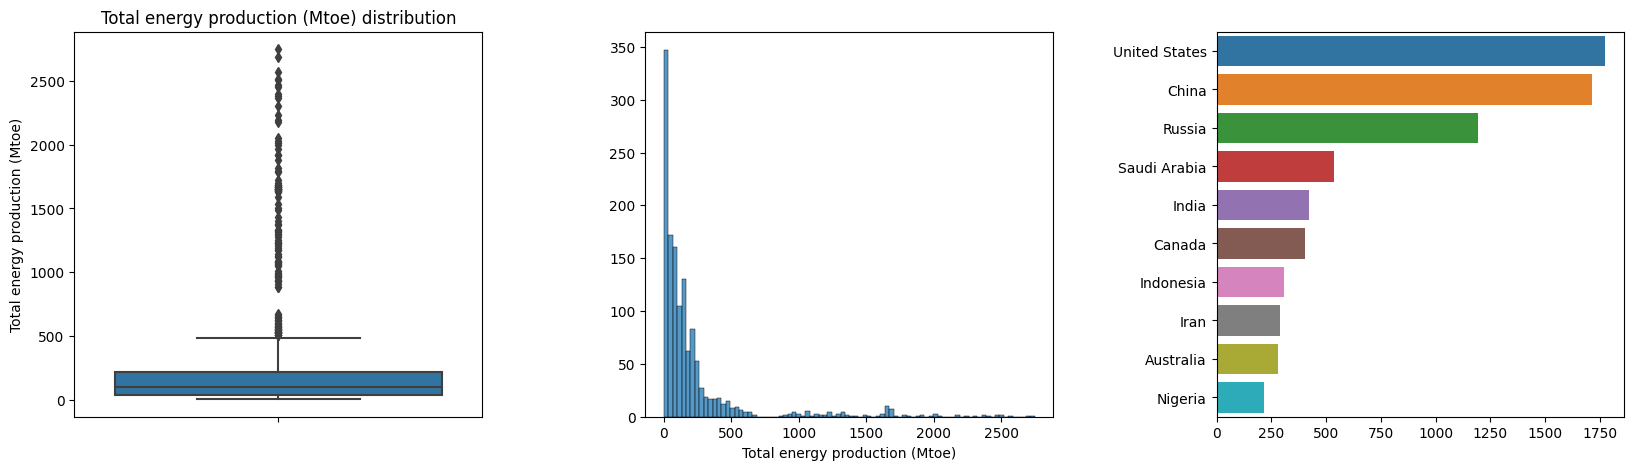

In [14]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Total energy production (Mtoe) distribution')
sns.boxplot(data=df, y='Total energy production (Mtoe)', ax=axes[0]).set_ylabel('Total energy production (Mtoe)')

sns.histplot(data=df, x='Total energy production (Mtoe)', ax=axes[1]).set_xlabel('Total energy production (Mtoe)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Total energy production (Mtoe)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Total energy production (Mtoe)').sort_values('Total energy production (Mtoe)', ascending=False)

sns.barplot(data=sorted_df, x='Total energy production (Mtoe)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

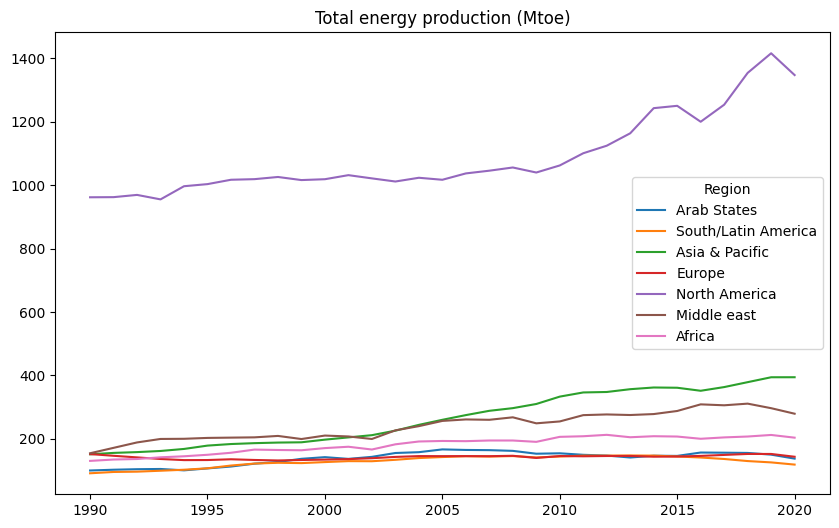

In [15]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Total energy production (Mtoe)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Total energy production (Mtoe)')
plt.xlabel("")
plt.ylabel("")
plt.show()

### From the previous graph, we observed that North America had the highest CO2 emissions from fuel combustion and these levels have been decreasing since 2006. 
### However, we also noticed that the total energy production in North America has increased significantly, from 1000 to 1400 mega tonnes of oil equivalent.
### This increase in energy production suggests that North America is transitioning towards other (green) sources of energy.

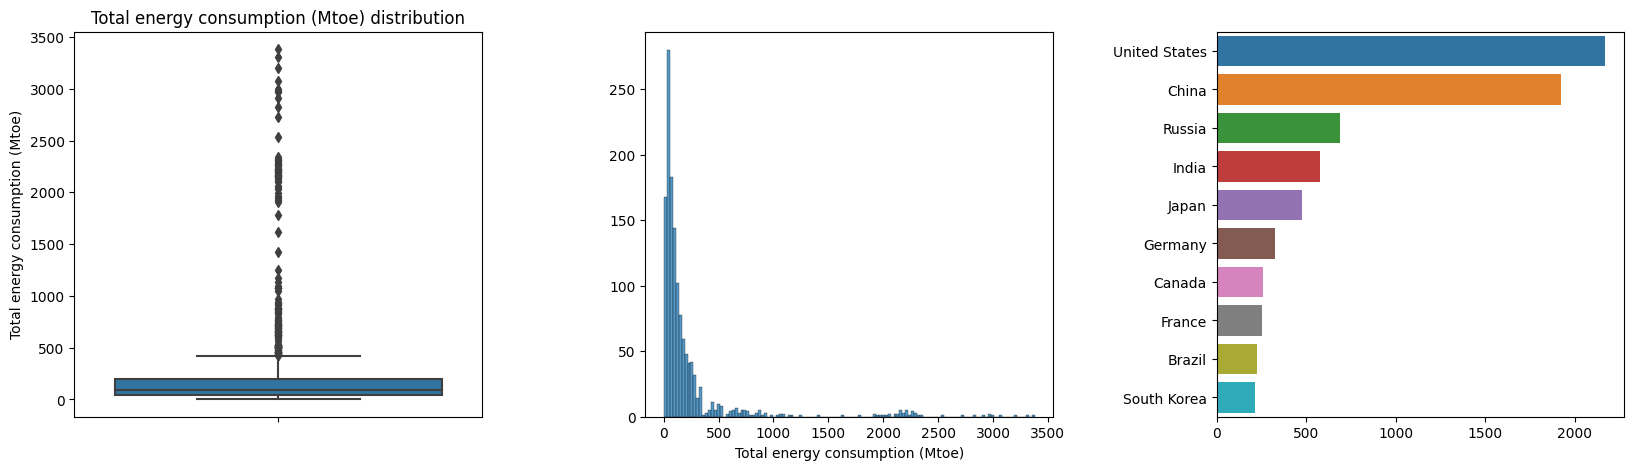

In [16]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Total energy consumption (Mtoe) distribution')
sns.boxplot(data=df, y='Total energy consumption (Mtoe)', ax=axes[0]).set_ylabel('Total energy consumption (Mtoe)')

sns.histplot(data=df, x='Total energy consumption (Mtoe)', ax=axes[1]).set_xlabel('Total energy consumption (Mtoe)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Total energy consumption (Mtoe)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Total energy consumption (Mtoe)').sort_values('Total energy consumption (Mtoe)', ascending=False)

sns.barplot(data=sorted_df, x='Total energy consumption (Mtoe)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

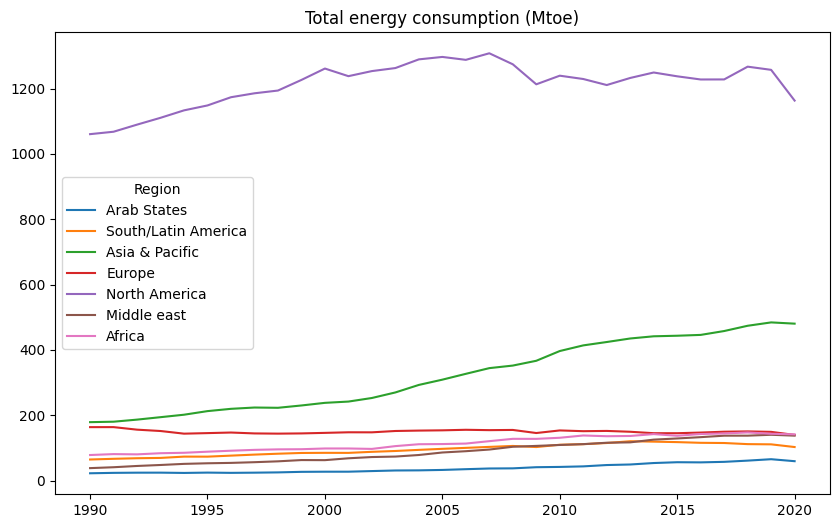

In [17]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Total energy consumption (Mtoe)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Total energy consumption (Mtoe)')
plt.xlabel("")
plt.ylabel("")
plt.show()

### Russia counsumes only half of energy produced in country.

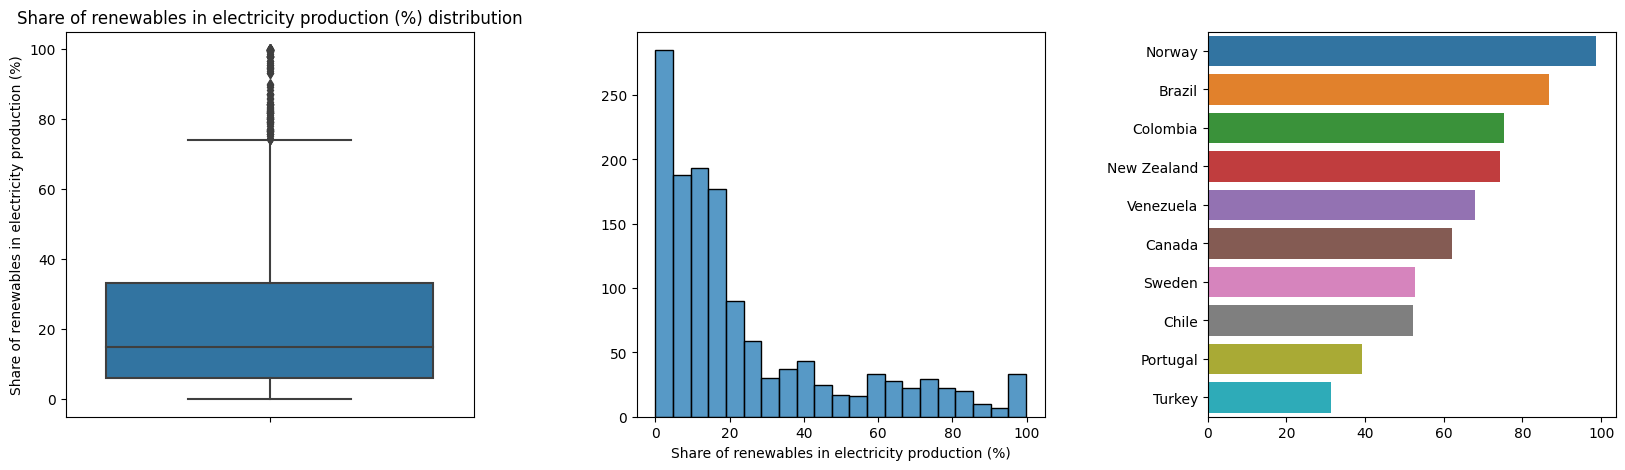

In [18]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Share of renewables in electricity production (%) distribution')
sns.boxplot(data=df, y='Share of renewables in electricity production (%)', ax=axes[0]).set_ylabel('Share of renewables in electricity production (%)')

sns.histplot(data=df, x='Share of renewables in electricity production (%)', ax=axes[1]).set_xlabel('Share of renewables in electricity production (%)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Share of renewables in electricity production (%)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Share of renewables in electricity production (%)').sort_values('Share of renewables in electricity production (%)', ascending=False)

sns.barplot(data=sorted_df, x='Share of renewables in electricity production (%)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

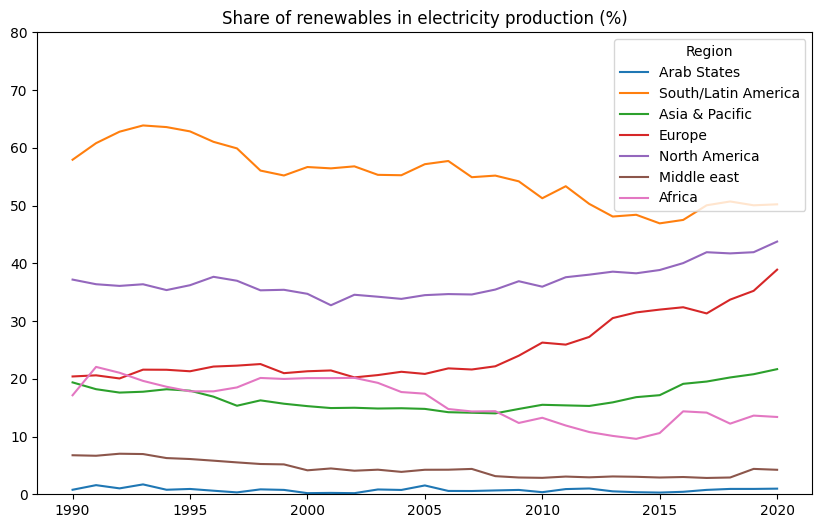

In [19]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Share of renewables in electricity production (%)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Share of renewables in electricity production (%)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 80)
plt.show()

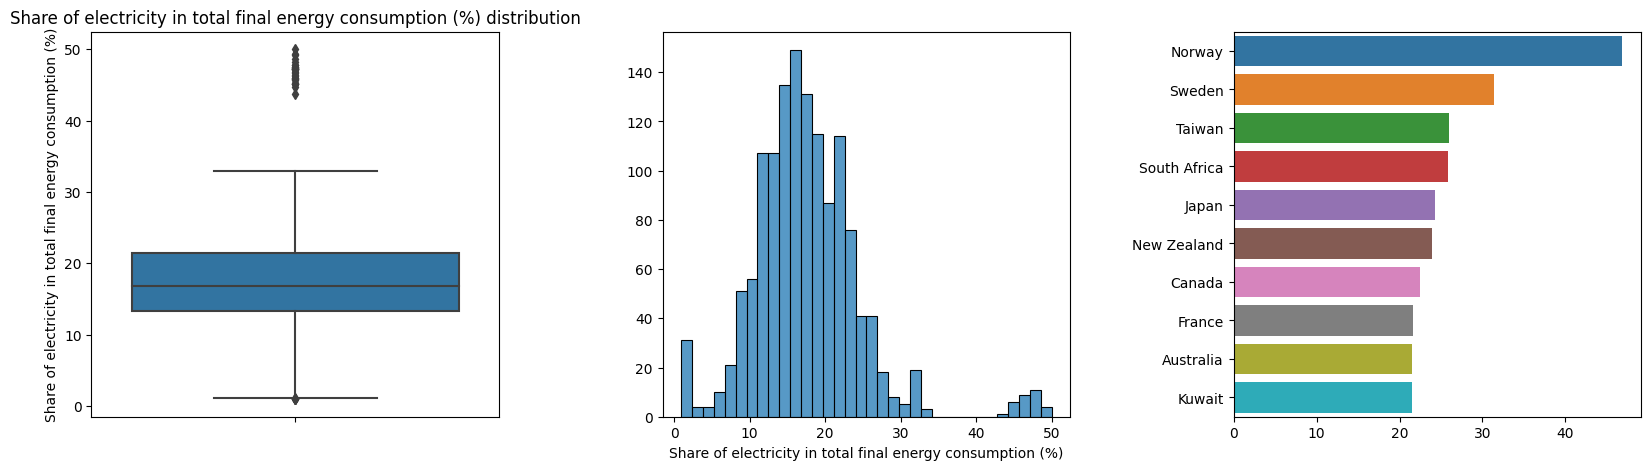

In [20]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Share of electricity in total final energy consumption (%) distribution')
sns.boxplot(data=df, y='Share of electricity in total final energy consumption (%)', ax=axes[0]).set_ylabel('Share of electricity in total final energy consumption (%)')

sns.histplot(data=df, x='Share of electricity in total final energy consumption (%)', ax=axes[1]).set_xlabel('Share of electricity in total final energy consumption (%)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Share of electricity in total final energy consumption (%)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Share of electricity in total final energy consumption (%)').sort_values('Share of electricity in total final energy consumption (%)', ascending=False)

sns.barplot(data=sorted_df, x='Share of electricity in total final energy consumption (%)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

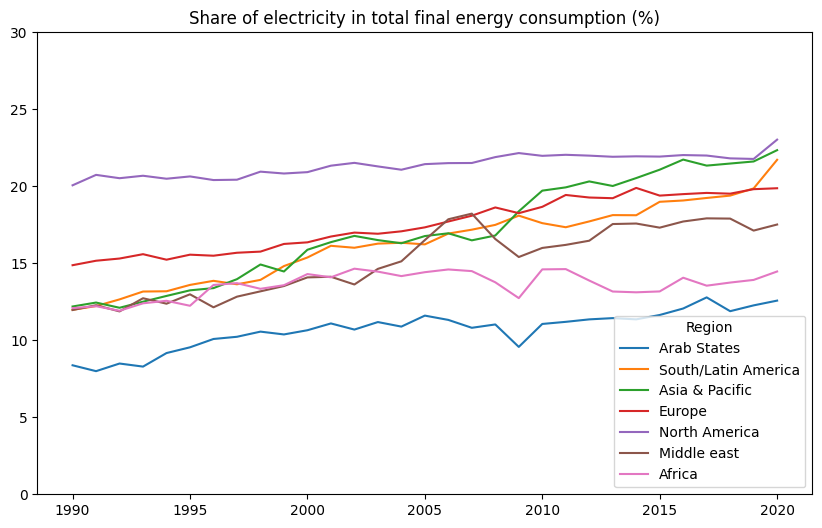

In [21]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Share of electricity in total final energy consumption (%)', x = 'Year', hue = 'Region', estimator = 'median', markers = False, errorbar=None)\
.set_title('Share of electricity in total final energy consumption (%)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 30)
plt.show()

### Among the top countries in the list, Norway stands out with a significantly high share of electricity compared to others, with a value almost twice as high as the rest. Norway has a much larger proportion of electricity in its energy mix compared to other leading countries.

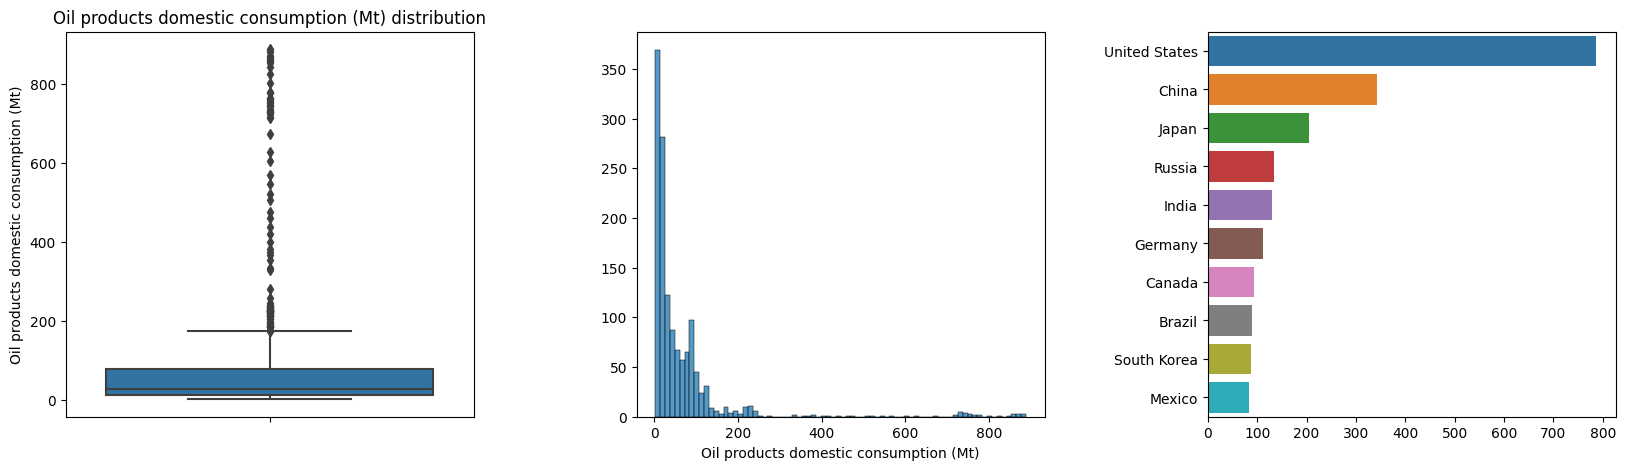

In [22]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Oil products domestic consumption (Mt) distribution')
sns.boxplot(data=df, y='Oil products domestic consumption (Mt)', ax=axes[0]).set_ylabel('Oil products domestic consumption (Mt)')

sns.histplot(data=df, x='Oil products domestic consumption (Mt)', ax=axes[1]).set_xlabel('Oil products domestic consumption (Mt)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Oil products domestic consumption (Mt)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Oil products domestic consumption (Mt)').sort_values('Oil products domestic consumption (Mt)', ascending=False)

sns.barplot(data=sorted_df, x='Oil products domestic consumption (Mt)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

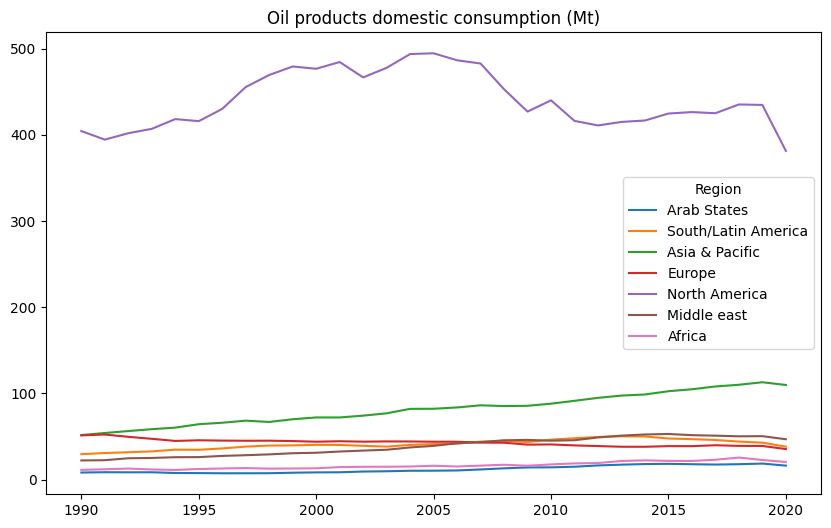

In [23]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Oil products domestic consumption (Mt)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Oil products domestic consumption (Mt)')
plt.xlabel("")
plt.ylabel("")
plt.show()

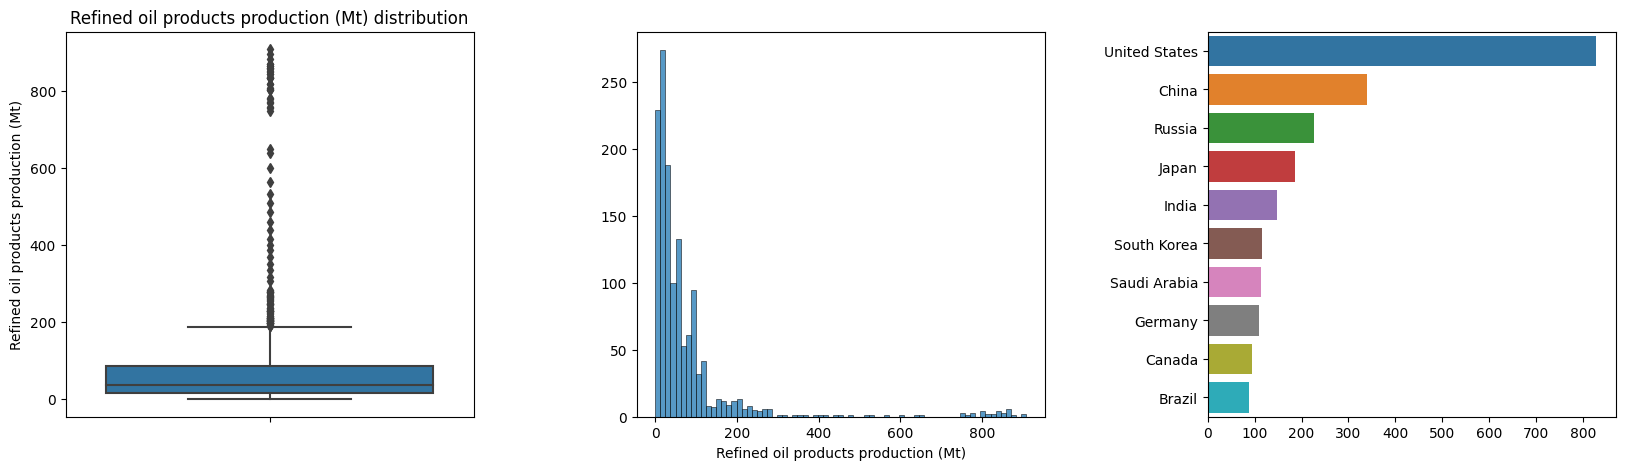

In [24]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Refined oil products production (Mt) distribution')
sns.boxplot(data=df, y='Refined oil products production (Mt)', ax=axes[0]).set_ylabel('Refined oil products production (Mt)')

sns.histplot(data=df, x='Refined oil products production (Mt)', ax=axes[1]).set_xlabel('Refined oil products production (Mt)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Refined oil products production (Mt)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Refined oil products production (Mt)').sort_values('Refined oil products production (Mt)', ascending=False)

sns.barplot(data=sorted_df, x='Refined oil products production (Mt)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

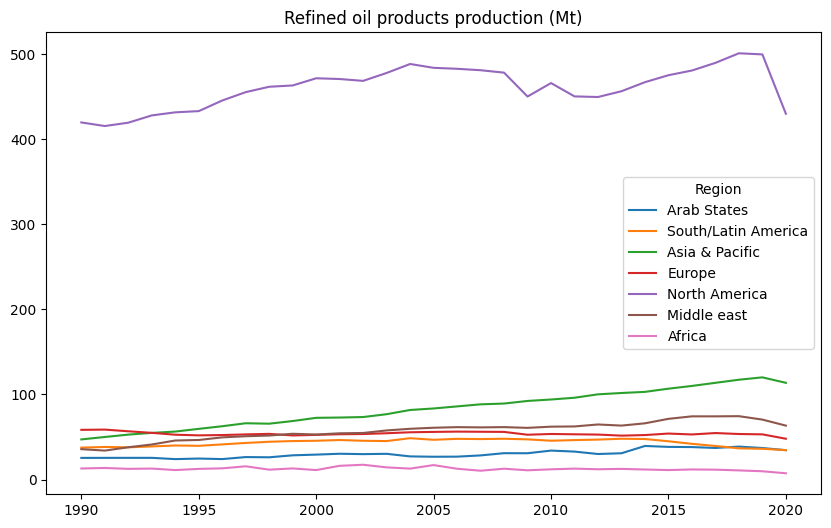

In [25]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Refined oil products production (Mt)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Refined oil products production (Mt)')
plt.xlabel("")
plt.ylabel("")
plt.show()

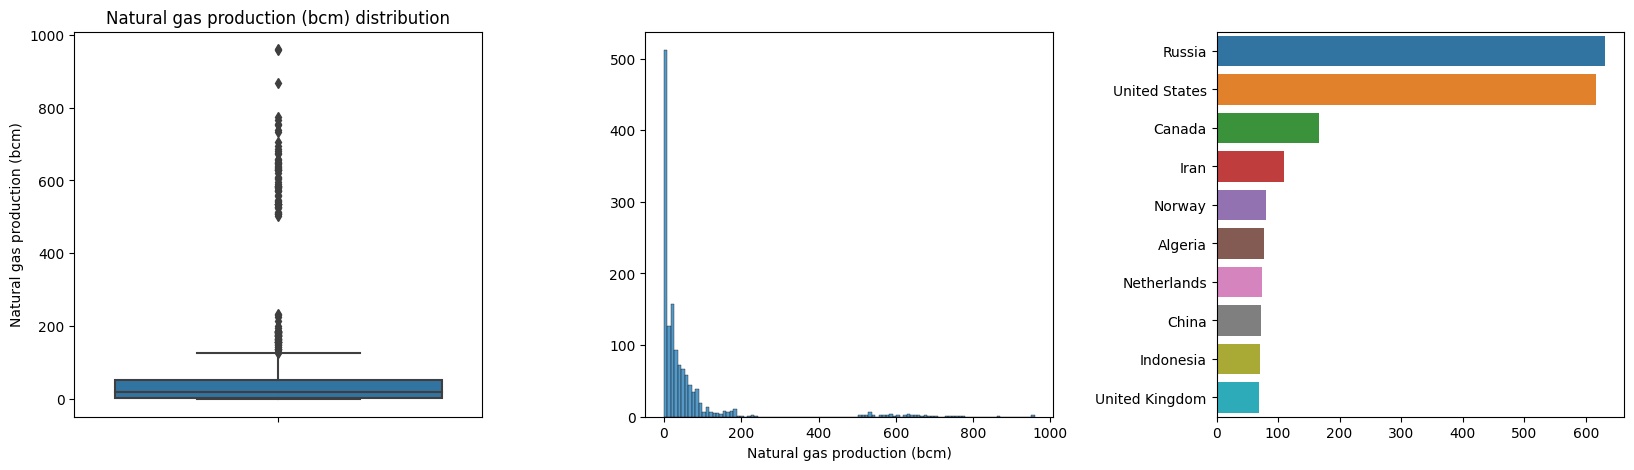

In [26]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Natural gas production (bcm) distribution')
sns.boxplot(data=df, y='Natural gas production (bcm)', ax=axes[0]).set_ylabel('Natural gas production (bcm)')

sns.histplot(data=df, x='Natural gas production (bcm)', ax=axes[1]).set_xlabel('Natural gas production (bcm)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Natural gas production (bcm)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Natural gas production (bcm)').sort_values('Natural gas production (bcm)', ascending=False)

sns.barplot(data=sorted_df, x='Natural gas production (bcm)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

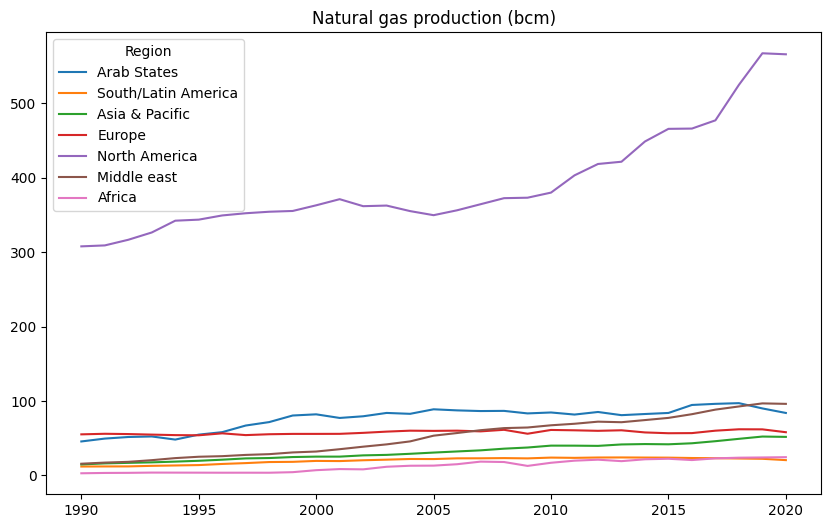

In [27]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Natural gas production (bcm)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Natural gas production (bcm)')
plt.xlabel("")
plt.ylabel("")
plt.show()

### Although Russia, as the largest natural gas producer, may not be representative of the European region on a graph, it still stands out as an outlier in terms of its gas production.

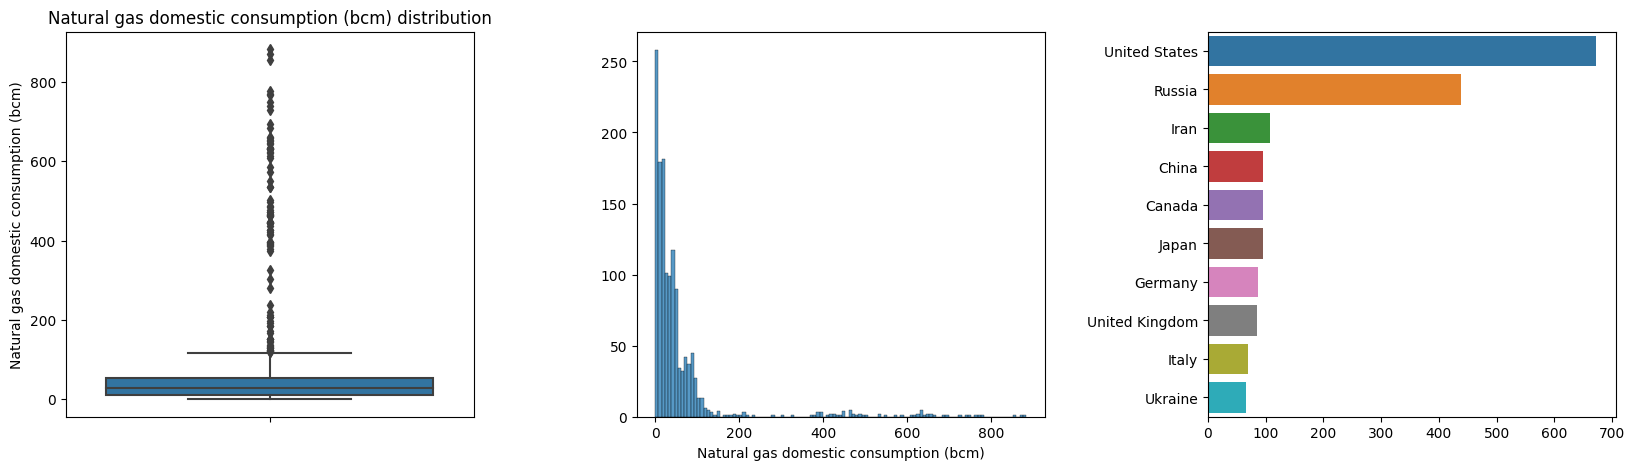

In [28]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Natural gas domestic consumption (bcm) distribution')
sns.boxplot(data=df, y='Natural gas domestic consumption (bcm)', ax=axes[0]).set_ylabel('Natural gas domestic consumption (bcm)')

sns.histplot(data=df, x='Natural gas domestic consumption (bcm)', ax=axes[1]).set_xlabel('Natural gas domestic consumption (bcm)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Natural gas domestic consumption (bcm)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Natural gas domestic consumption (bcm)').sort_values('Natural gas domestic consumption (bcm)', ascending=False)

sns.barplot(data=sorted_df, x='Natural gas domestic consumption (bcm)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

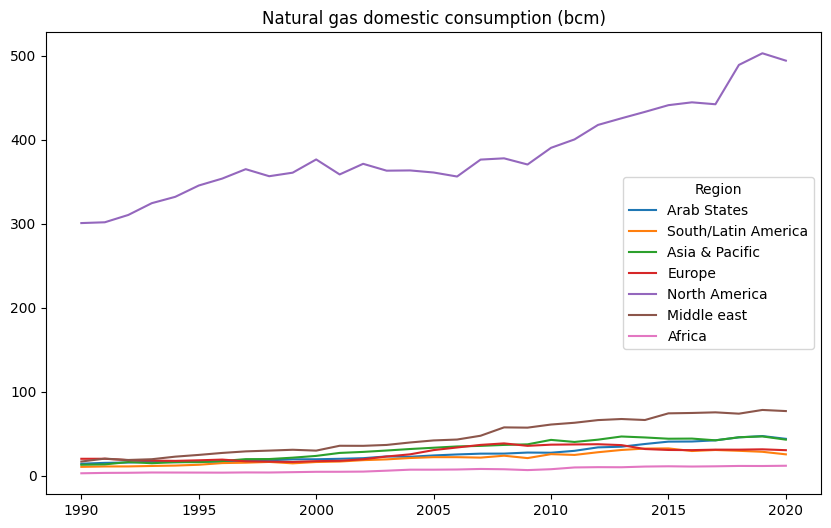

In [29]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Natural gas domestic consumption (bcm)', x = 'Year', hue = 'Region', estimator = 'median', markers = False, errorbar=None)\
.set_title('Natural gas domestic consumption (bcm)')
plt.xlabel("")
plt.ylabel("")
plt.show()

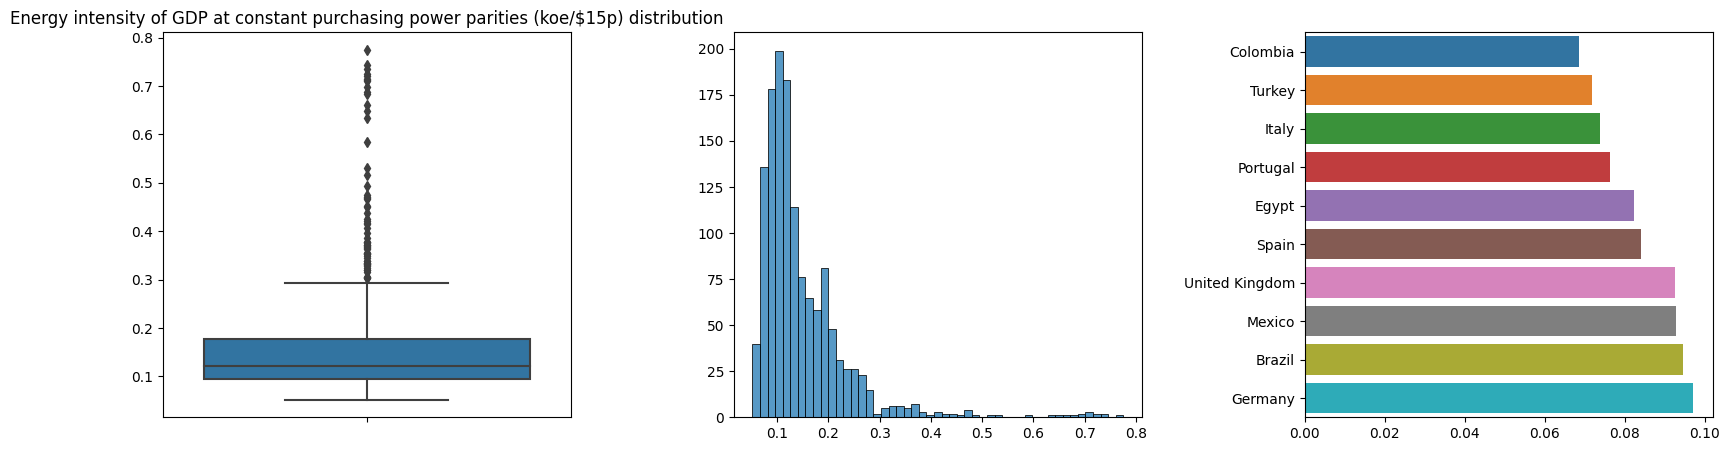

In [30]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Energy intensity of GDP at constant purchasing power parities (koe/$15p) distribution')
sns.boxplot(data=df, y='Energy intensity of GDP at constant purchasing power parities (koe/$15p)', ax=axes[0]).set_ylabel('Energy intensity of GDP at constant purchasing power parities (koe/$15p)')

sns.histplot(data=df, x='Energy intensity of GDP at constant purchasing power parities (koe/$15p)', ax=axes[1]).set_xlabel('Energy intensity of GDP at constant purchasing power parities (koe/$15p)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Energy intensity of GDP at constant purchasing power parities (koe/$15p)'].mean().reset_index()
sorted_df = grouped_df.nsmallest(10, 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)').sort_values('Energy intensity of GDP at constant purchasing power parities (koe/$15p)')

sns.barplot(data=sorted_df, x='Energy intensity of GDP at constant purchasing power parities (koe/$15p)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")
axes[0].set_ylabel("")
axes[1].set_xlabel("")
plt.show()

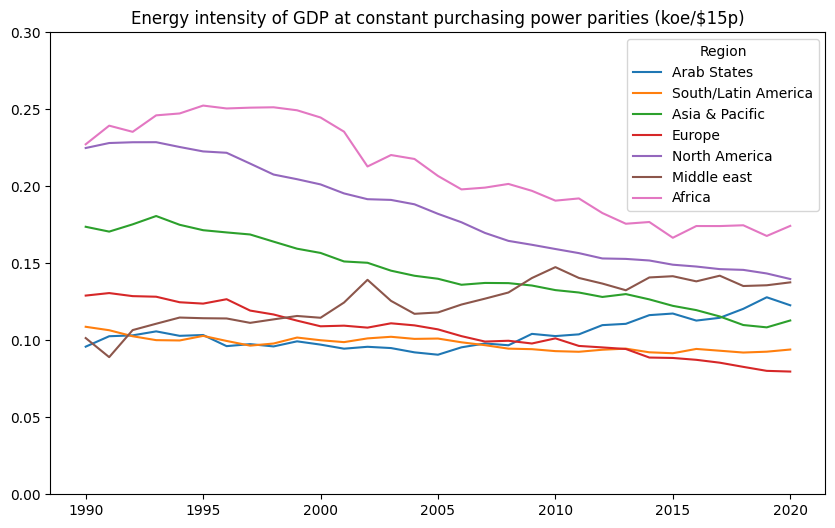

In [31]:
# plotting data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Energy intensity of GDP at constant purchasing power parities (koe/$15p)', x = 'Year', hue = 'Region', estimator = 'median', markers = False, errorbar=None)\
.set_title('Energy intensity of GDP at constant purchasing power parities (koe/$15p)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 0.3)
plt.show()

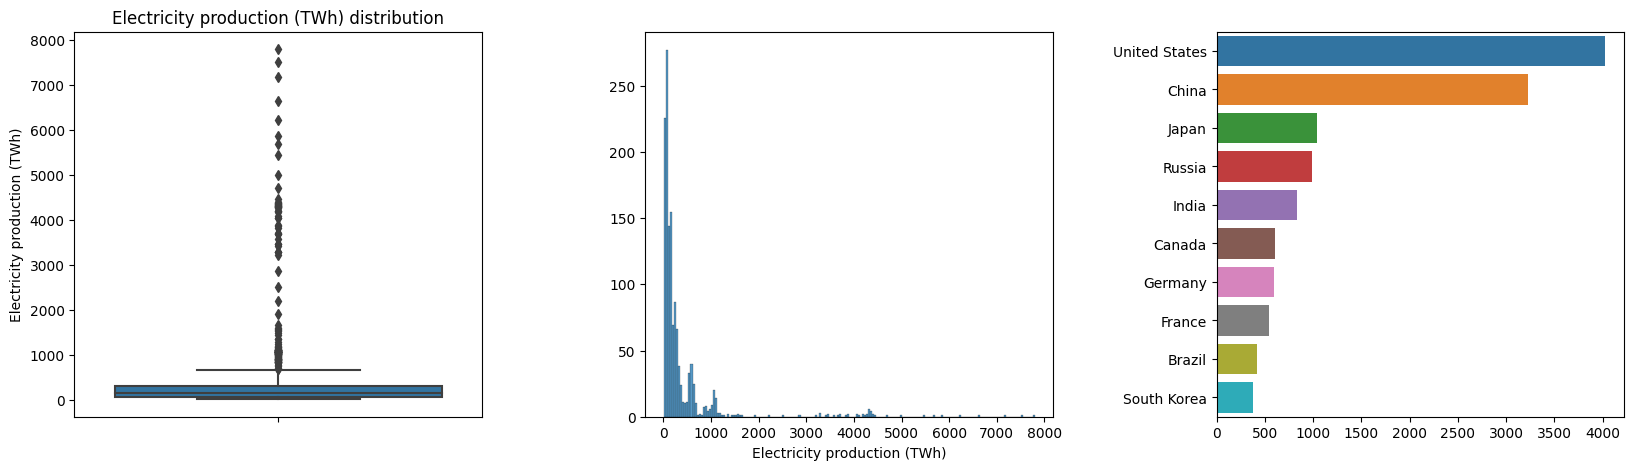

In [32]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Electricity production (TWh) distribution')
sns.boxplot(data=df, y='Electricity production (TWh)', ax=axes[0]).set_ylabel('Electricity production (TWh)')

sns.histplot(data=df, x='Electricity production (TWh)', ax=axes[1]).set_xlabel('Electricity production (TWh)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Electricity production (TWh)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Electricity production (TWh)').sort_values('Electricity production (TWh)', ascending=False)

sns.barplot(data=sorted_df, x='Electricity production (TWh)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

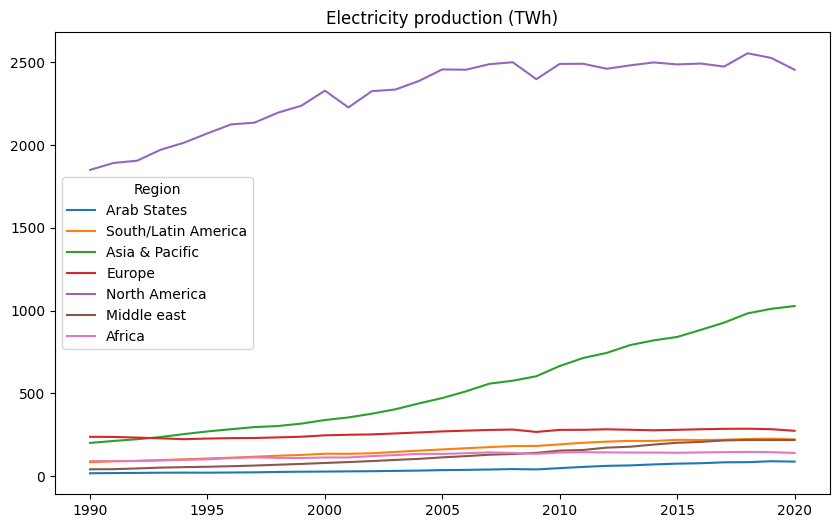

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Electricity production (TWh)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Electricity production (TWh)')
plt.xlabel("")
plt.ylabel("")
plt.show()

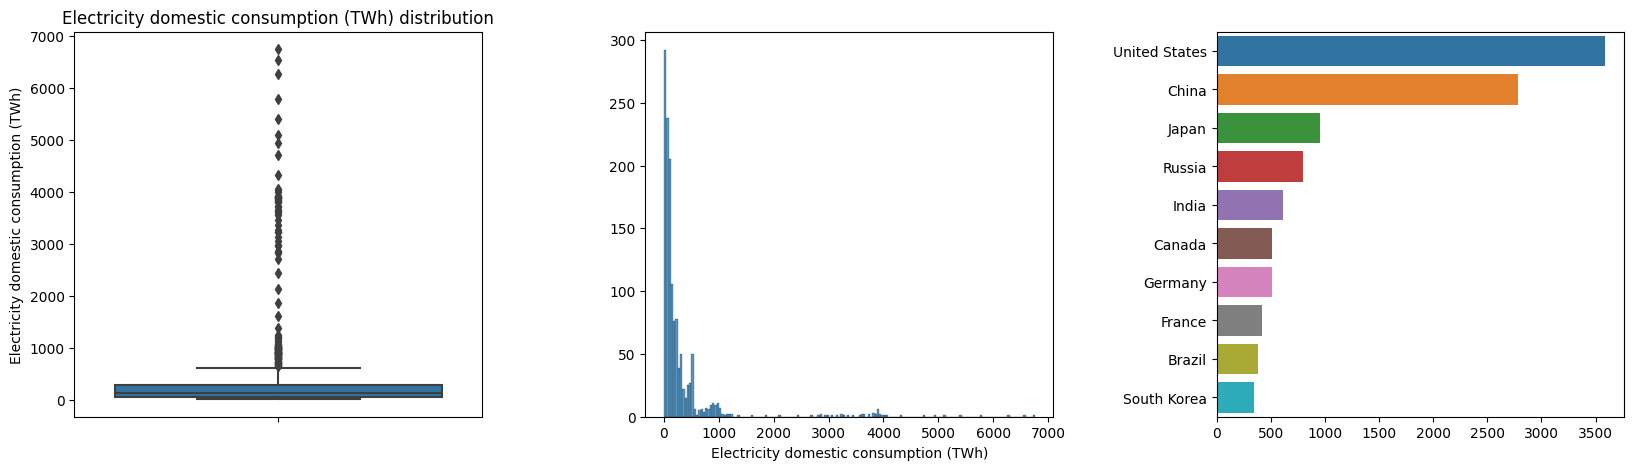

In [34]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Electricity domestic consumption (TWh) distribution')
sns.boxplot(data=df, y='Electricity domestic consumption (TWh)', ax=axes[0]).set_ylabel('Electricity domestic consumption (TWh)')

sns.histplot(data=df, x='Electricity domestic consumption (TWh)', ax=axes[1]).set_xlabel('Electricity domestic consumption (TWh)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Electricity domestic consumption (TWh)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Electricity domestic consumption (TWh)').sort_values('Electricity domestic consumption (TWh)', ascending=False)

sns.barplot(data=sorted_df, x='Electricity domestic consumption (TWh)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

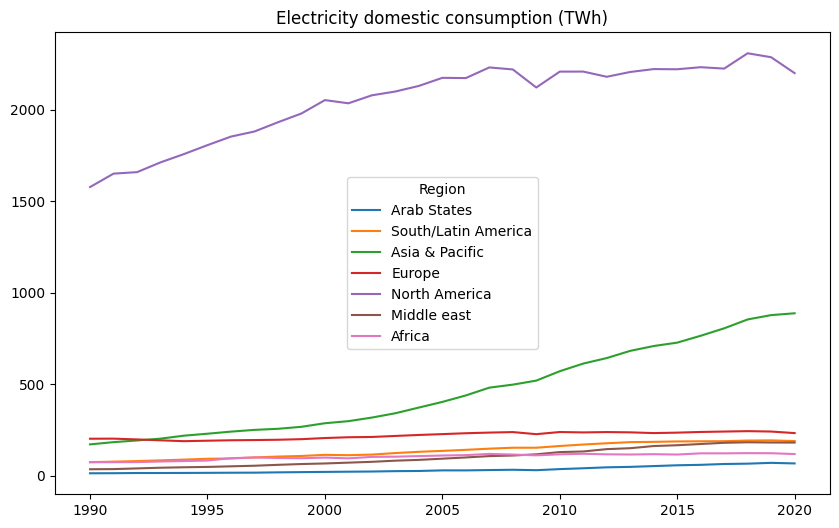

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Electricity domestic consumption (TWh)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Electricity domestic consumption (TWh)')
plt.xlabel("")
plt.ylabel("")
plt.show()

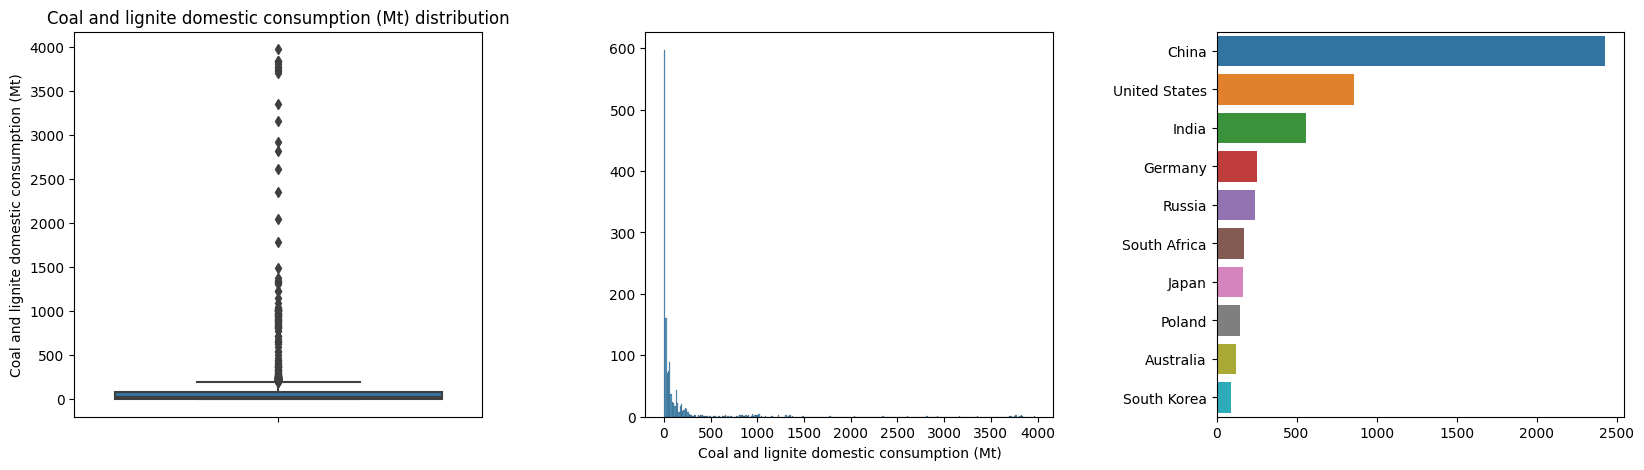

In [36]:
# Plotting data
fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Coal and lignite domestic consumption (Mt) distribution')
sns.boxplot(data=df, y='Coal and lignite domestic consumption (Mt)', ax=axes[0]).set_ylabel('Coal and lignite domestic consumption (Mt)')

sns.histplot(data=df, x='Coal and lignite domestic consumption (Mt)', ax=axes[1]).set_xlabel('Coal and lignite domestic consumption (Mt)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Coal and lignite domestic consumption (Mt)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Coal and lignite domestic consumption (Mt)').sort_values('Coal and lignite domestic consumption (Mt)', ascending=False)

sns.barplot(data=sorted_df, x='Coal and lignite domestic consumption (Mt)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

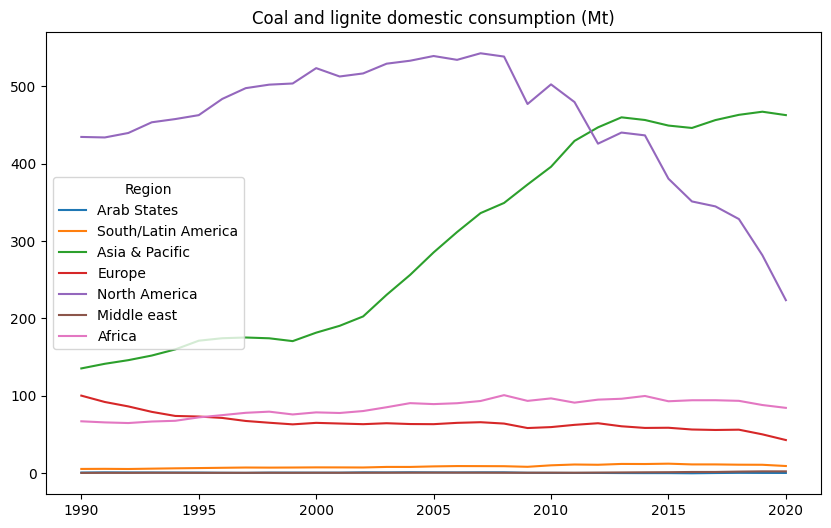

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Coal and lignite domestic consumption (Mt)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Coal and lignite domestic consumption (Mt)')
plt.xlabel("")
plt.ylabel("")
plt.show()

### In terms of domestic consumption of coal and lignite, China distinguishes itself from the United States by having a significantly higher amount, with a value almost three times greater.

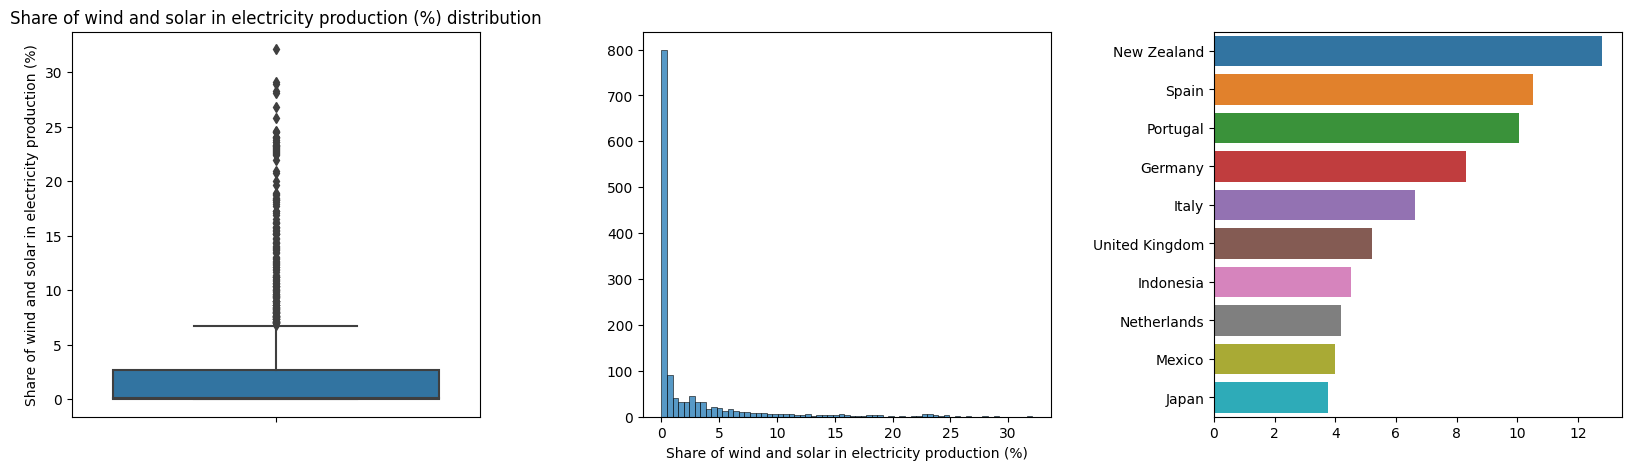

In [38]:
# Plotting data

fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Share of wind and solar in electricity production (%) distribution')
sns.boxplot(data=df, y='Share of wind and solar in electricity production (%)', ax=axes[0]).set_ylabel('Share of wind and solar in electricity production (%)')

sns.histplot(data=df, x='Share of wind and solar in electricity production (%)', ax=axes[1]).set_xlabel('Share of wind and solar in electricity production (%)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Share of wind and solar in electricity production (%)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Share of wind and solar in electricity production (%)').sort_values('Share of wind and solar in electricity production (%)', ascending=False)

sns.barplot(data=sorted_df, x='Share of wind and solar in electricity production (%)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

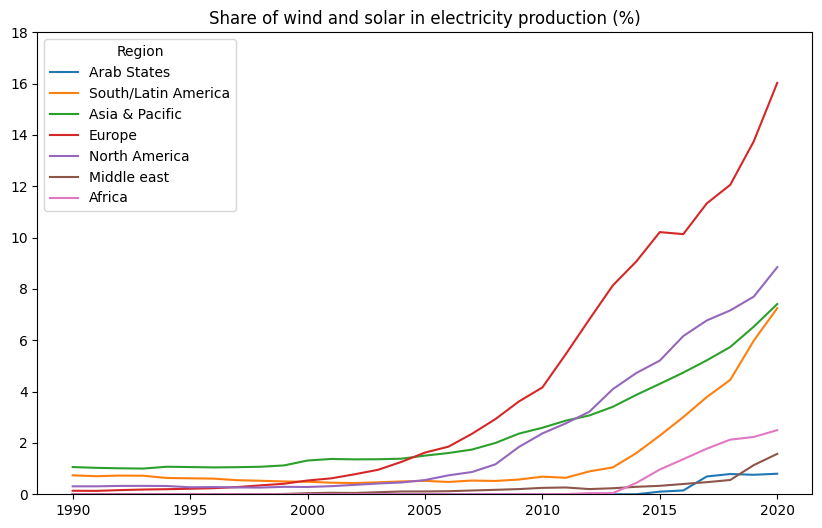

In [39]:
# Plotting data

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Share of wind and solar in electricity production (%)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Share of wind and solar in electricity production (%)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 18)

plt.show()

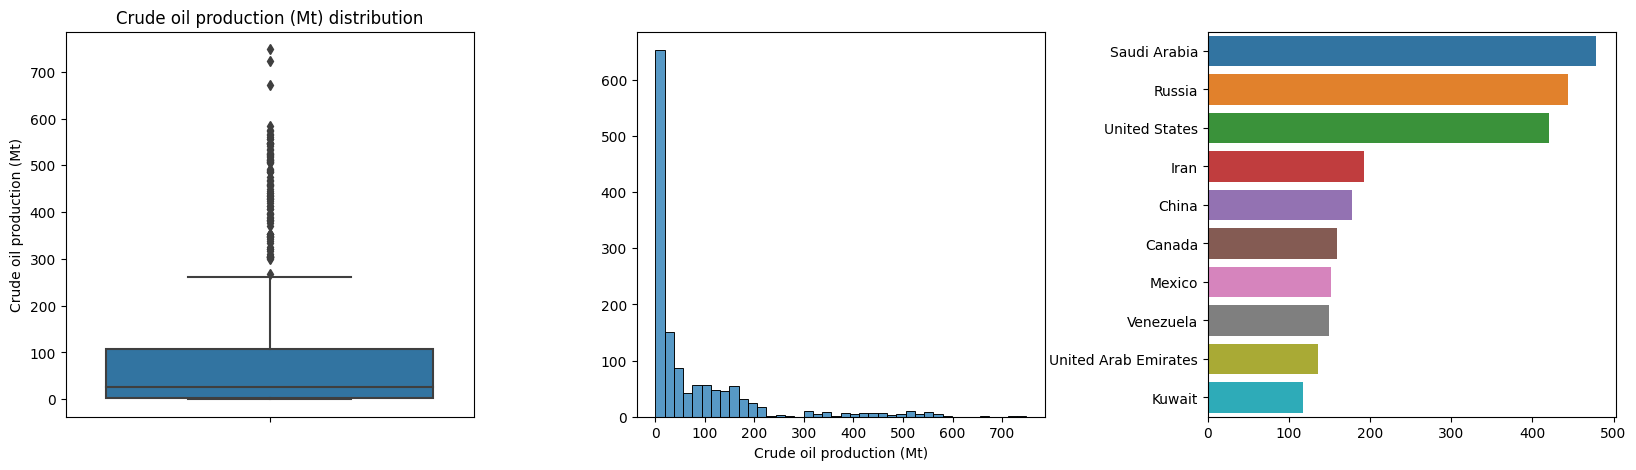

In [40]:
# Plotting data

fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Crude oil production (Mt) distribution')
sns.boxplot(data=df, y='Crude oil production (Mt)', ax=axes[0]).set_ylabel('Crude oil production (Mt)')

sns.histplot(data=df, x='Crude oil production (Mt)', ax=axes[1]).set_xlabel('Crude oil production (Mt)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Crude oil production (Mt)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Crude oil production (Mt)').sort_values('Crude oil production (Mt)', ascending=False)

sns.barplot(data=sorted_df, x='Crude oil production (Mt)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

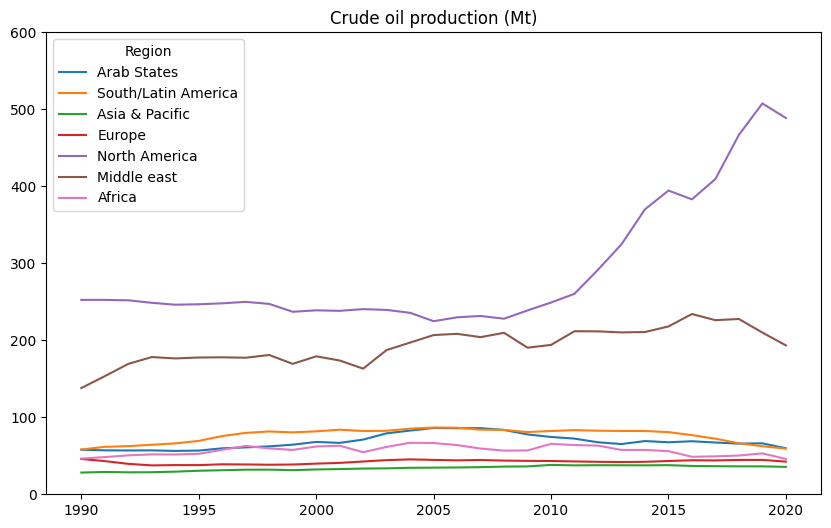

In [41]:
# Plotting data

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Crude oil production (Mt)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Crude oil production (Mt)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 600)

plt.show()

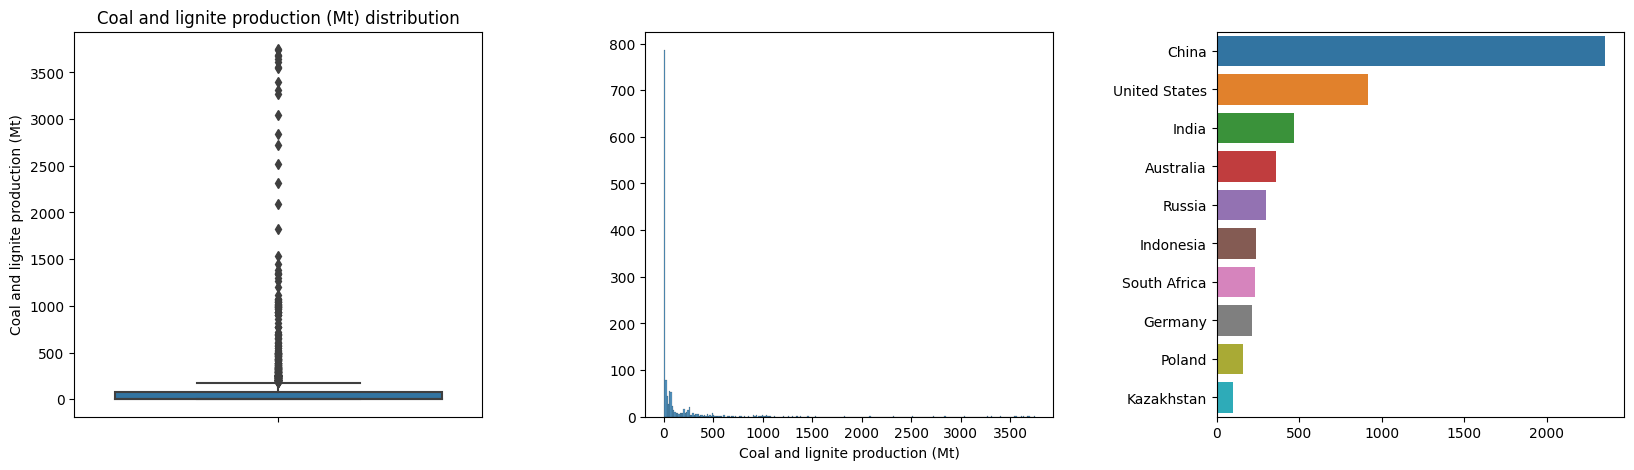

In [42]:
# Plotting data

fig, axes = plt.subplots(1, 3, figsize=(20,5), gridspec_kw={'width_ratios': [1, 1, 1]})
fig.subplots_adjust(wspace=0.4)

axes[0].set_title('Coal and lignite production (Mt) distribution')
sns.boxplot(data=df, y='Coal and lignite production (Mt)', ax=axes[0]).set_ylabel('Coal and lignite production (Mt)')

sns.histplot(data=df, x='Coal and lignite production (Mt)', ax=axes[1]).set_xlabel('Coal and lignite production (Mt)')
axes[1].set_ylabel("")

grouped_df = df.groupby('country')['Coal and lignite production (Mt)'].mean().reset_index()
sorted_df = grouped_df.nlargest(10, 'Coal and lignite production (Mt)').sort_values('Coal and lignite production (Mt)', ascending=False)

sns.barplot(data=sorted_df, x='Coal and lignite production (Mt)', y='country', ax=axes[2], errorbar=None, order=sorted_df['country']).set_ylabel('')
axes[2].set_xlabel("")

plt.show()

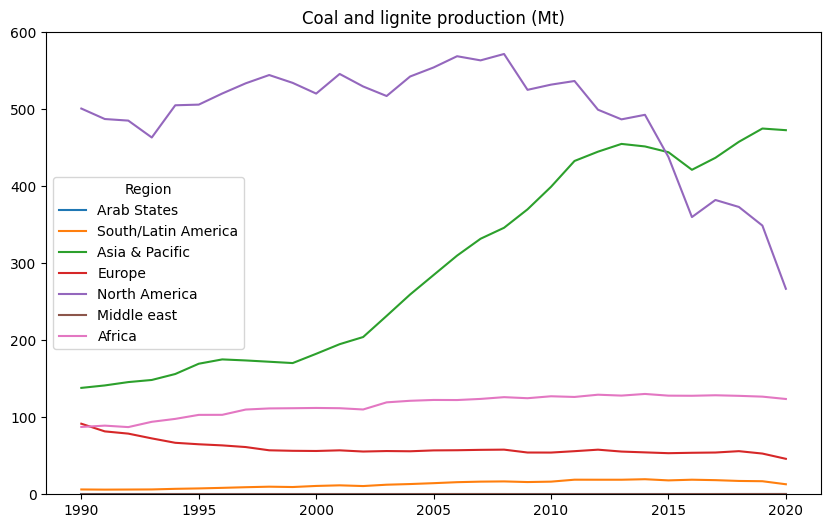

In [43]:
# Plotting data

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Coal and lignite production (Mt)', x = 'Year', hue = 'Region', estimator = 'mean', markers = False, errorbar=None)\
.set_title('Coal and lignite production (Mt)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 600)

plt.show()

In [44]:
# Bivariate analysis

In [45]:
cr = df.iloc[: , 3:]
corr_matrix = cr.corr()
corr_matrix

,CO2 emissions from fuel combustion (MtCO2),Average CO2 emission factor (tCO2/toe),CO2 intensity at constant purchasing power parities (kCO2/$15p),Total energy production (Mtoe),Total energy consumption (Mtoe),Share of renewables in electricity production (%),Share of electricity in total final energy consumption (%),Oil products domestic consumption (Mt),Refined oil products production (Mt),Natural gas production (bcm),Natural gas domestic consumption (bcm),Energy intensity of GDP at constant purchasing power parities (koe/$15p),Electricity production (TWh),Electricity domestic consumption (TWh),Coal and lignite domestic consumption (Mt),Share of wind and solar in electricity production (%),Crude oil production (Mt),Coal and lignite production (Mt)
CO2 emissions from fuel combustion (MtCO2),1.000000,0.203074,0.166831,0.915701,0.990632,-0.117377,0.010975,0.883694,0.873999,0.547121,0.676902,0.102395,0.973465,0.969436,0.911913,0.012557,0.448813,0.907132
Average CO2 emission factor (tCO2/toe),0.203074,1.000000,0.489971,0.137877,0.145476,-0.562855,-0.150981,0.107419,0.110292,0.040555,0.088793,0.142983,0.128116,0.127615,0.236720,-0.155261,0.027750,0.260831
CO2 intensity at constant purchasing power parities (kCO2/$15p),0.166831,0.489971,1.000000,0.173768,0.136194,-0.361654,-0.208228,0.050833,0.054587,0.132247,0.114956,0.922538,0.084052,0.077970,0.201421,-0.289860,0.068146,0.215861
Total energy production (Mtoe),0.915701,0.137877,0.173768,1.000000,0.924969,-0.078679,-0.048509,0.822100,0.851515,0.750395,0.778109,0.143330,0.887897,0.881486,0.783965,-0.057741,0.723797,0.814272
Total energy consumption (Mtoe),0.990632,0.145476,0.136194,0.924969,1.000000,-0.107352,0.008709,0.926530,0.921391,0.608919,0.742813,0.092248,0.983155,0.979843,0.858972,0.018104,0.486539,0.855410
Share of renewables in electricity production (%),-0.117377,-0.562855,-0.361654,-0.078679,-0.107352,1.000000,0.399660,-0.111910,-0.123911,-0.069014,-0.143387,-0.211822,-0.074505,-0.073091,-0.087607,0.230219,-0.051715,-0.087626
Share of electricity in total final energy consumption (%),0.010975,-0.150981,-0.208228,-0.048509,0.008709,0.399660,1.000000,0.046085,0.038579,-0.028861,-0.016989,-0.216560,0.093189,0.099883,-0.007993,0.222596,-0.100040,-0.023128
Oil products domestic consumption (Mt),0.883694,0.107419,0.050833,0.822100,0.926530,-0.111910,0.046085,1.000000,0.986324,0.653839,0.826126,0.015279,0.918195,0.922658,0.630945,0.024216,0.506904,0.631283
Refined oil products production (Mt),0.873999,0.110292,0.054587,0.851515,0.921391,-0.123911,0.038579,0.986324,1.000000,0.726653,0.875091,0.020057,0.912491,0.916371,0.609737,0.014637,0.585614,0.609898
Natural gas production (bcm),0.547121,0.040555,0.132247,0.750395,0.608919,-0.069014,-0.028861,0.653839,0.726653,1.000000,0.938402,0.150010,0.581809,0.582140,0.252093,-0.064764,0.741646,0.295926


In [46]:
corr_matrix.to_csv('corr.csv')

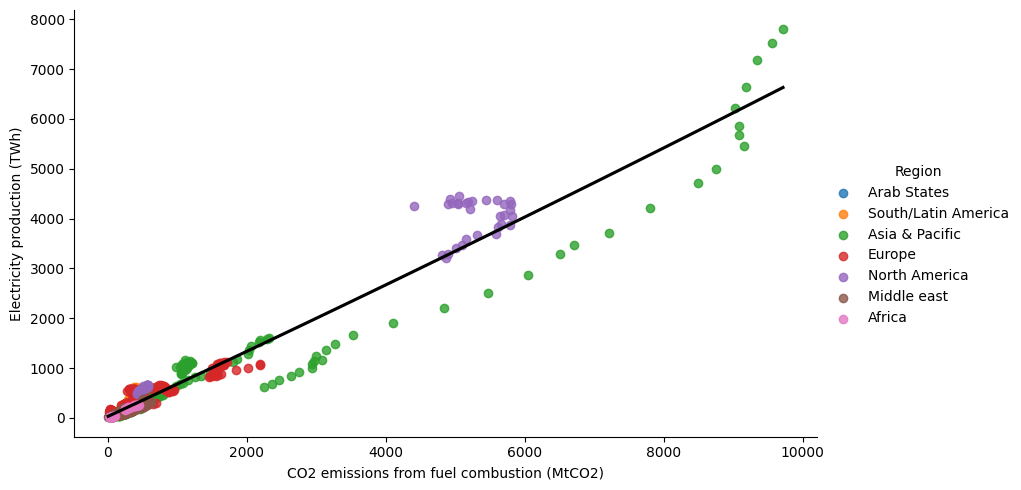

In [70]:
# checking correlation

sns.lmplot(data = df, x = 'CO2 emissions from fuel combustion (MtCO2)', y = 'Electricity production (TWh)', order = 2, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'CO2 emissions from fuel combustion (MtCO2)', y = 'Electricity production (TWh)', order = 2, ci = None, scatter=False, color='black')

plt.show()

In [58]:
stats.spearmanr(df['CO2 emissions from fuel combustion (MtCO2)'], df['Electricity production (TWh)'])

SignificanceResult(statistic=0.9040697730502747, pvalue=0.0)

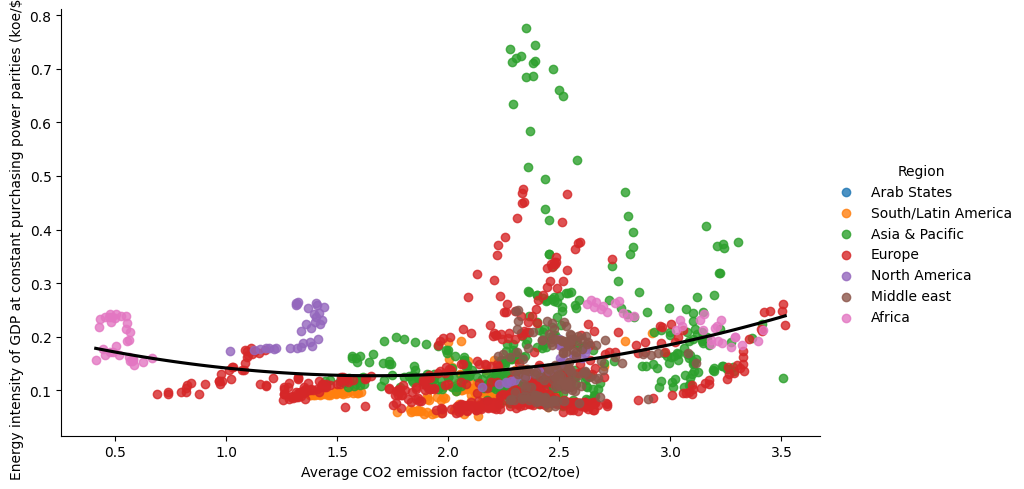

In [59]:
# checking correlation

sns.lmplot(data = df, x = 'Average CO2 emission factor (tCO2/toe)', y = 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)', order = 2, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'Average CO2 emission factor (tCO2/toe)', y = 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)', order = 2, ci = None, scatter=False, color='black')

plt.show()

In [60]:
stats.spearmanr(df['Average CO2 emission factor (tCO2/toe)'], df['Energy intensity of GDP at constant purchasing power parities (koe/$15p)'])

SignificanceResult(statistic=0.22575613390940114, pvalue=3.193977423979393e-17)

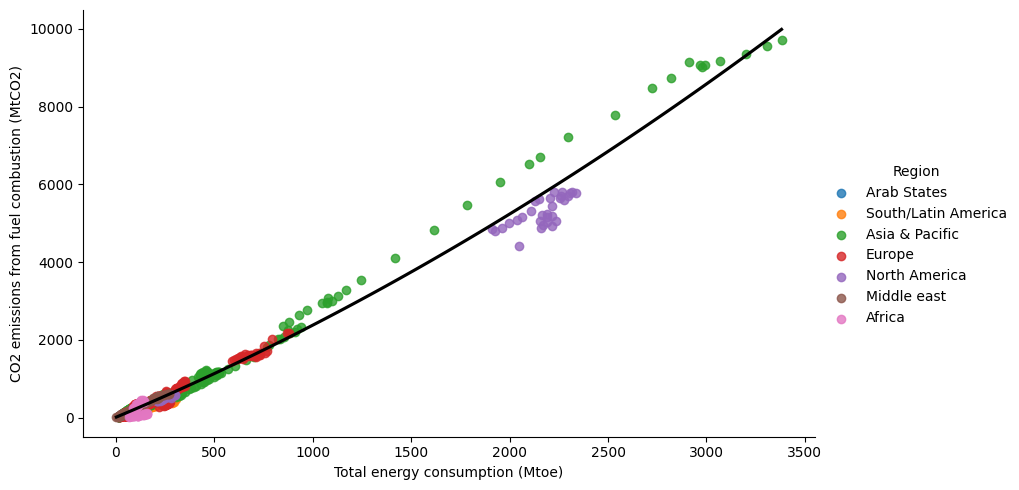

In [61]:
# checking correlation

sns.lmplot(data = df, x = 'Total energy consumption (Mtoe)', y = 'CO2 emissions from fuel combustion (MtCO2)', order = 2, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'Total energy consumption (Mtoe)', y = 'CO2 emissions from fuel combustion (MtCO2)', order = 2, ci = None, scatter=False, color='black')

plt.show()

In [62]:
stats.spearmanr(df['Total energy consumption (Mtoe)'], df['CO2 emissions from fuel combustion (MtCO2)'])

SignificanceResult(statistic=0.9507574526153088, pvalue=0.0)

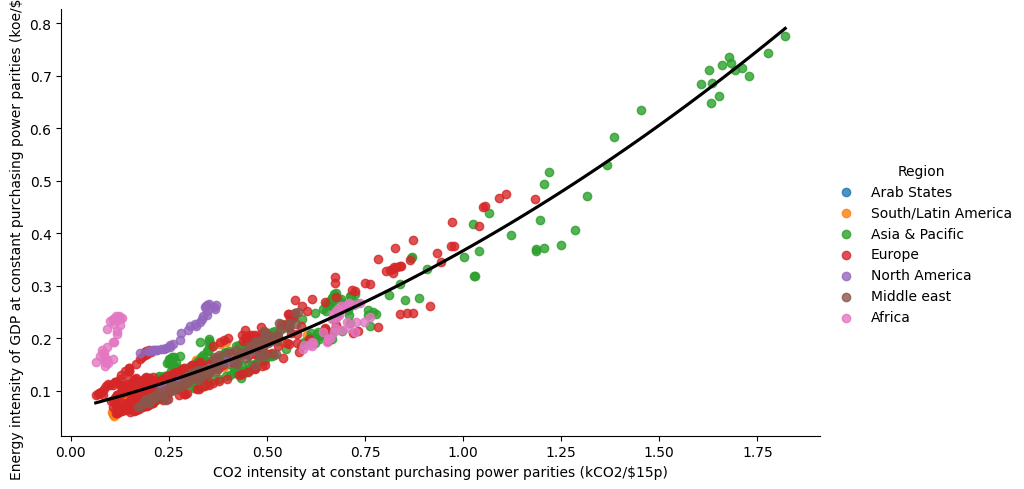

In [63]:
# checking correlation

sns.lmplot(data = df, x = 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', y = 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)', order = 2, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', y = 'Energy intensity of GDP at constant purchasing power parities (koe/$15p)', order = 2, ci = None, scatter=False, color='black')

plt.show()

In [64]:
stats.spearmanr(df['CO2 intensity at constant purchasing power parities (kCO2/$15p)'], df['Energy intensity of GDP at constant purchasing power parities (koe/$15p)'])

SignificanceResult(statistic=0.7999151488702526, pvalue=2.4269383442193637e-304)

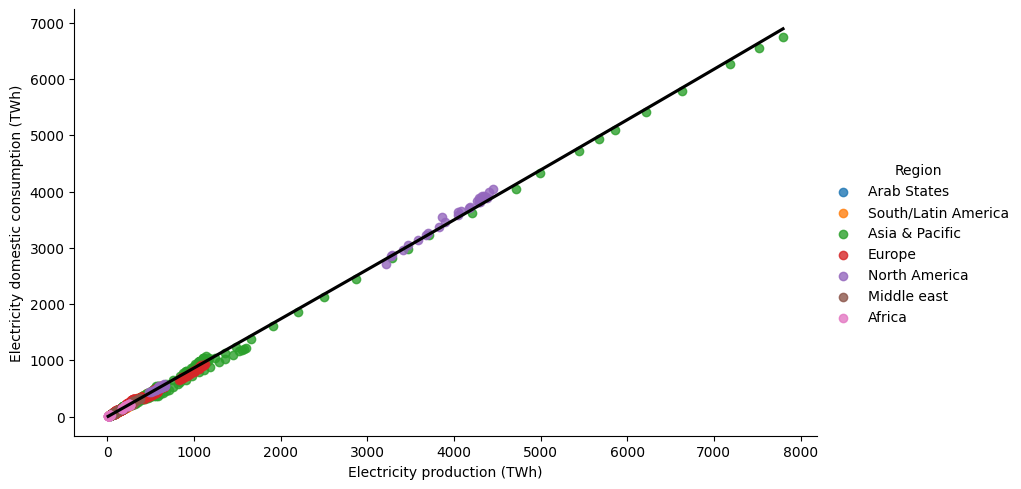

In [52]:
# checking correlation

sns.lmplot(data = df, x = 'Electricity production (TWh)', y = 'Electricity domestic consumption (TWh)', order = 2, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'Electricity production (TWh)', y = 'Electricity domestic consumption (TWh)', order = 2, ci = None, scatter=False, color='black')

plt.show()

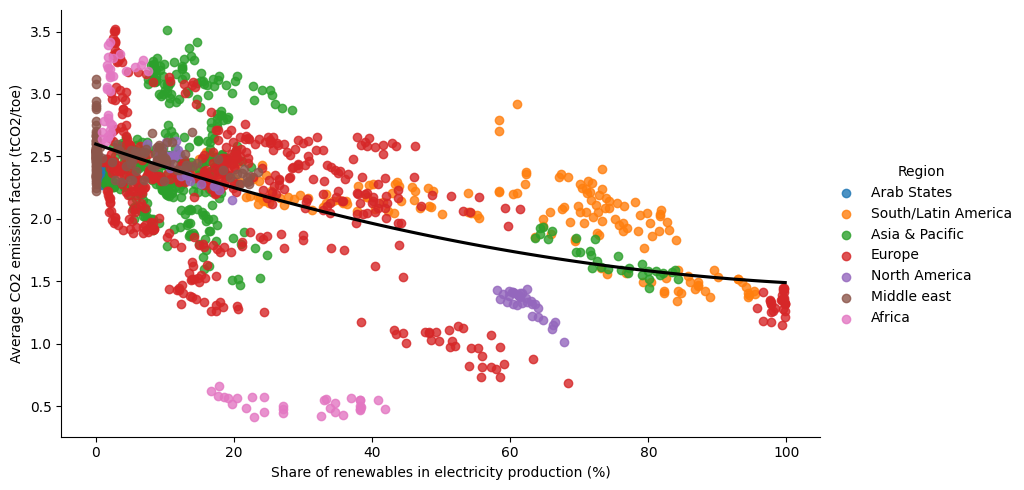

In [74]:
# checking correlation

sns.lmplot(data = df, x = 'Share of renewables in electricity production (%)', y = 'Average CO2 emission factor (tCO2/toe)', order = 2, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'Share of renewables in electricity production (%)', y = 'Average CO2 emission factor (tCO2/toe)', order = 2, ci = None, scatter=False, color='black')

plt.show()

In [77]:
stats.spearmanr(df['Share of renewables in electricity production (%)'], df['Average CO2 emission factor (tCO2/toe)'])

SignificanceResult(statistic=-0.5560725919681186, pvalue=1.5160243115150751e-111)

### There is a lack of correlation between the share of renewables and CO2 emissions in the Arab States region. For the African region a comparison cannot be made due to the dataset only containing data for two countries.

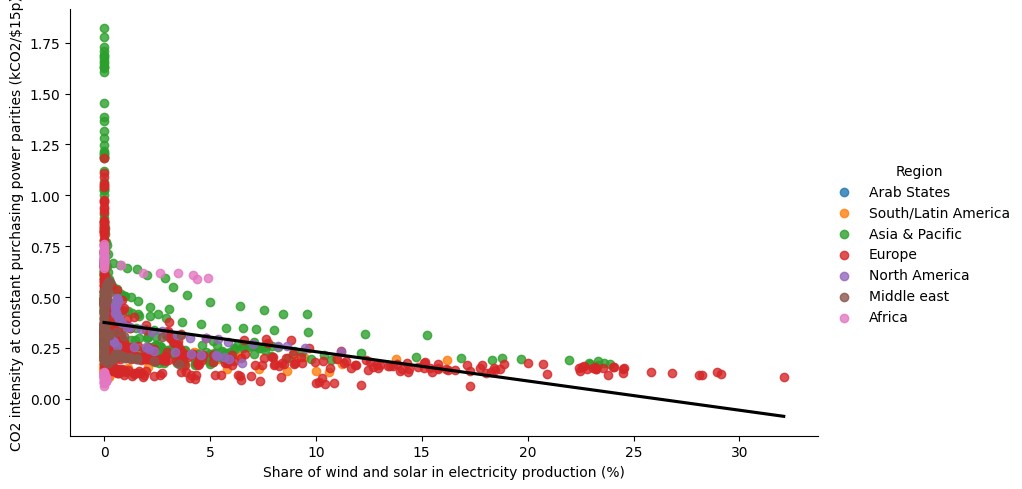

In [54]:
# checking correlation

sns.lmplot(data = df, x = 'Share of wind and solar in electricity production (%)', y = 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', order = 1, ci = None, height=5, aspect=1.7, hue = 'Region', fit_reg=False)
sns.regplot(data = df, x = 'Share of wind and solar in electricity production (%)', y = 'CO2 intensity at constant purchasing power parities (kCO2/$15p)', order = 1, ci = None, scatter=False, color='black')

plt.show()

In [78]:
stats.spearmanr(df['Share of wind and solar in electricity production (%)'], df['CO2 intensity at constant purchasing power parities (kCO2/$15p)'])

SignificanceResult(statistic=-0.4445514105124398, pvalue=3.683118149163257e-67)